<a href="https://colab.research.google.com/github/niapollard/Benchmarking_QC/blob/main/052824_BOND_DISTANCE_PLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q jarvis-tools qiskit==0.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
!pip install qiskit_nature==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.1 MB/s eta 0:00:00


In [3]:
!pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 12.6 MB/s eta 0:00:00


In [4]:
!pip install qiskit-aer==0.12.0

In [5]:
import numpy as np

# Importing Qiskit and Jarvis libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.drivers.second_quantization import MethodType
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.transformers.second_quantization.electronic.active_space_transformer import ActiveSpaceTransformer
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
import itertools, functools
from qiskit.opflow import I, X, Y, Z
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
from pyscf import gto, scf, tools

<ipython-input-5-ccff2813ef8f>:29: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
<ipython-input-5-ccff2813ef8f>:29: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver


In [13]:
import matplotlib.pyplot as plt

1.2 Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP object at 0x7ccabf3b6860> lda statevector_simulator


<ipython-input-14-e2449e15c53a>:23: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


device statevector_simulator
seed 42


<ipython-input-14-e2449e15c53a>:66: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-14-e2449e15c53a>:69: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Bond distance 1.2: (8.5066017987e-08+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -551.405158804873
  - computed part:      -2.637805831808
  - ActiveSpaceTransformer extracted energy part: -548.767352973065
~ Nuclear repulsion energy (Hartree): 74.5257905379
> Total ground state energy (Hartree): -476.879368266973
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.591 S^2: 0.940 M: -0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  29.47972754]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.00019633  0.00017191  29.45836302]
    - computed part:      [-0.00046466  -0.00030469  4.52755102]
    - ActiveSpaceTransformer extracted energy part: [0.00026833  0.0004766  24.930812]
  > Dipole moment (a.u.): [0.00019633  -0.00017191  0.02136452]  Total: 0.02136611
                 (debye): [0.00049902  -0.00043695  0.05430318]  Total: 0.05430723
 
1.5 Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP objec

<ipython-input-14-e2449e15c53a>:23: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


device statevector_simulator
seed 42


<ipython-input-14-e2449e15c53a>:66: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-14-e2449e15c53a>:69: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Bond distance 1.5: (8.5066017987e-08+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -537.071766704448
  - computed part:      -2.384369540147
  - ActiveSpaceTransformer extracted energy part: -534.6873971643
~ Nuclear repulsion energy (Hartree): 59.62063243032
> Total ground state energy (Hartree): -477.451134274128
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.618 S^2: 1.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  36.84965943]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.00000017  0.00000014  36.84964453]
    - computed part:      [-0.00000001  0.00000002  5.66916393]
    - ActiveSpaceTransformer extracted energy part: [-0.00000016  0.00000012  31.1804806]
  > Dipole moment (a.u.): [0.00000017  -0.00000014  0.0000149]  Total: 0.0000149
                 (debye): [0.00000042  -0.00000035  0.00003787]  Total: 0.00003788
 
2.0 Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP object 

<ipython-input-14-e2449e15c53a>:23: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


device statevector_simulator
seed 42


<ipython-input-14-e2449e15c53a>:66: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-14-e2449e15c53a>:69: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Bond distance 2.0: (8.5066017987e-08+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -522.427006609334
  - computed part:      -2.08170312551
  - ActiveSpaceTransformer extracted energy part: -520.345303483824
~ Nuclear repulsion energy (Hartree): 44.71547432274
> Total ground state energy (Hartree): -477.711532286594
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.618 S^2: 1.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  49.13287924]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.00000078  0.00000071  49.13284588]
    - computed part:      [-0.00000065  0.00000057  7.5588787]
    - ActiveSpaceTransformer extracted energy part: [-0.00000013  0.00000015  41.57396718]
  > Dipole moment (a.u.): [0.00000078  -0.00000071  0.00003336]  Total: 0.00003337
                 (debye): [0.00000198  -0.00000181  0.00008478]  Total: 0.00008483
 


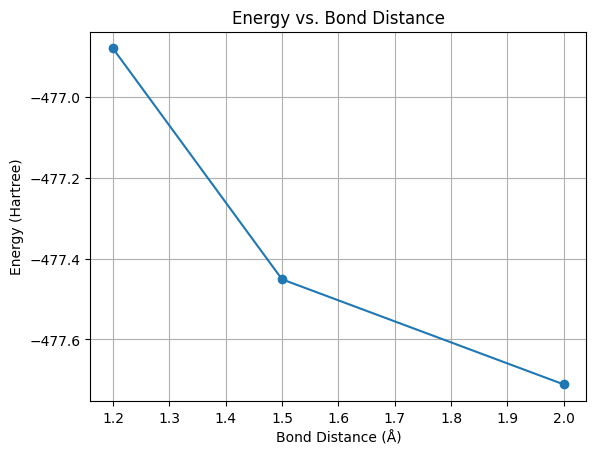

In [14]:
%matplotlib inline

def make_diatomic_system(element='Al', bond_distance=1.2):
    pos = [(element, [0, 0, 0]), (element, [0, 0, bond_distance])]
    return pos

def get_qubit_op(
    molecule,
    basis='sto3g',
    functional='lda',
    method= MethodType.RKS,
    driver_type= ElectronicStructureDriverType.PYSCF,
    converter= JordanWignerMapper()):

  driver=ElectronicStructureMoleculeDriver(molecule, basis, method,driver_type)
  properties = driver.run()
  problem = ElectronicStructureProblem(driver)

  second_q_ops = problem.second_q_ops()
  second_q_ops = list(second_q_ops.values()) #list of second quantized operators
  hamiltonian=second_q_ops[0]

  numpy_solver = NumPyMinimumEigensolver()
  tmp = properties.get_property('ParticleNumber')
  alpha_occ=tmp.occupation_alpha
  beta_occ=tmp.occupation_beta

  mo_considered=3
  #active and inactive space has to be even, non-magnetic

  first_index = min(np.where(alpha_occ<1)[0][0],np.where(beta_occ<1)[0][0])

  orb_act = np.arange(first_index-mo_considered,first_index)+1

  transformer= ActiveSpaceTransformer(num_electrons=mo_considered+1, num_molecular_orbitals=len(orb_act), active_orbitals=orb_act)
  problem_reduced = ElectronicStructureProblem(driver, [transformer])
  second_q_ops_reduced = problem_reduced.second_q_ops()

  second_q_ops_reduced = list(second_q_ops_reduced.values())
  hamiltonian_reduced = second_q_ops_reduced[0]
  mapper = JordanWignerMapper()
  converter = QubitConverter(mapper=mapper)
  qubit_op = converter.convert(hamiltonian_reduced)

  res1={}
  res1['qubit_op']=qubit_op
  res1['converter']=converter
  res1['problem_reduced']=problem_reduced

  return res1 #qubit_op, converter, problem_reduced

def get_energy(optimizer='',device='',qubit_op='',seed=''):
  seed = 42
  counts = []
  values = []


  def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

  algorithm_globals.random_seed = seed
  print('device',device)
  print('seed',seed)

  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
  n_qubits = qubit_op.num_qubits
  ansatz = QuantumCircuitLibrary(n_qubits=n_qubits, reps=1).circuit6()
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)
  result = vqe.compute_minimum_eigenvalue(operator=qubit_op)


  eigenvalue = result.eigenvalue
  # return eigenvalue, vqe, qi

  res={}
  res['eigenvalue']=eigenvalue
  res['vqe']=vqe
  res['qi']=qi
  return res

elements=['Al']
basis=['sto3g']
method=[MethodType.RKS]
#driver_type=[]
optimizer=[SLSQP(maxiter=1000)]
#converter=[JordanWignerMapper()]
functionals=['lda']
devices=[Aer.get_backend('statevector_simulator')]
mem={}

bond_distances = [1.2, 1.5, 2.0]
energies = []


for bond_distance in bond_distances:
    positions = make_diatomic_system(bond_distance=bond_distance)  # Pass bond_distance to the function
    molecule = Molecule(geometry=positions, charge=0, multiplicity=1)

    for i in elements:
      for j in basis:
        for k in method:
          #for l in driver_type:
          for m in optimizer:
            #for n in converter:
              for o in functionals:
                for p in devices:
                    print(bond_distance,i,j,k,m,o,p)

                    res1=get_qubit_op(molecule=molecule,basis=j,functional=o,method=k)
                    res=get_energy(optimizer=m,device=p,qubit_op=res1['qubit_op'],seed=42)
                    print(f'Bond distance {bond_distance}: {res["eigenvalue"]}')

                    #print(res['eigenvalue'])

                    #GroundStateEigensolver
                    solver =GroundStateEigensolver(res1['converter'], res['vqe'])
                    result=solver.solve(res1['problem_reduced'])
                    print(result)

                    # Collect bond distance and energy
                    energies.append(result.total_energies[0].real)

                    mem[bond_distance,i,j,k,m,n,o,p]= {
                        'eigenvalue': res['eigenvalue'],
                        'vqe': res['vqe'],
                        'qi': res['qi'],
                        'converter': res1['converter'],
                        'problem_reduced': res1['problem_reduced']
                    }

plt.plot(bond_distances, energies, marker='o')
plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy vs. Bond Distance')
plt.grid(True)
plt.show()